In [1]:
%cd ..

/home/kobayashi/project/NML_Discrete_Model


In [2]:
import math
import random
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

## 実験1

In [3]:
df1 = pd.read_table("results/4choice-identifiable-acc-dtype.dat", skiprows=3)
df2 = pd.read_table("other_method/results/acc-dtype.dat")
df3 = pd.read_table("results/2choice-nonidentifiable-acc-dtype.dat", skiprows=3)

In [4]:
df2.drop("dtype", inplace=True, axis=1)
df3.drop("dtype", inplace=True, axis=1)
df1.rename(columns={"ndm": "Cloud(4)"}, inplace=True)
df3.rename(columns={"ndm": "Cloud(2)"}, inplace=True)

In [5]:
pd.concat([df1, df2, df3], axis=1)

,dtype,Cloud(4),dc,ent,dr,cisc,acid,crisp,Cloud(2)
0,uniform,98.3,49.9,92.7,89.2,97.1,94.6,100.0,99.5
1,binomial,99.1,21.3,94.6,92.0,93.4,98.1,100.0,99.6
2,negativeBinomial,99.8,28.4,60.0,94.0,36.5,100.0,100.0,99.8
3,geometric,99.7,6.3,92.2,92.9,89.6,98.9,99.9,99.8
4,hypergeometric,97.4,17.6,89.1,89.5,98.4,94.7,100.0,99.1
5,poisson,99.8,24.9,96.5,96.0,91.9,100.0,100.0,100.0
6,multinomial,98.9,44.4,93.4,90.1,97.6,95.7,100.0,99.5


In [6]:
df_all = pd.concat([df1, df2, df3], axis=1)

In [7]:
df_all

,dtype,Cloud(4),dc,ent,dr,cisc,acid,crisp,Cloud(2)
0,uniform,98.3,49.9,92.7,89.2,97.1,94.6,100.0,99.5
1,binomial,99.1,21.3,94.6,92.0,93.4,98.1,100.0,99.6
2,negativeBinomial,99.8,28.4,60.0,94.0,36.5,100.0,100.0,99.8
3,geometric,99.7,6.3,92.2,92.9,89.6,98.9,99.9,99.8
4,hypergeometric,97.4,17.6,89.1,89.5,98.4,94.7,100.0,99.1
5,poisson,99.8,24.9,96.5,96.0,91.9,100.0,100.0,100.0
6,multinomial,98.9,44.4,93.4,90.1,97.6,95.7,100.0,99.5


In [8]:
dist_name = df_all.dtype.values

In [9]:
plt.rcParams['legend.fontsize'] = 16

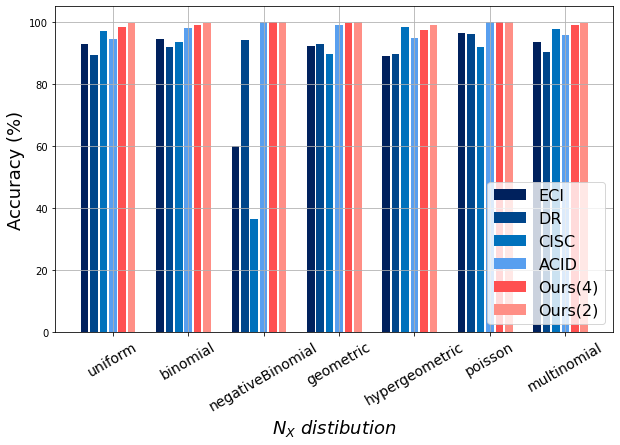

In [40]:
plt.figure(figsize=(10, 6))
i = 1
plt.bar(np.arange(i - .75, i + 13 - .75, 2), df_all.ent.values, label="ECI", align="center", width=0.2, color="#00215d")
plt.bar(np.arange(i - .5, i + 13 - .5, 2), df_all.dr.values, label="DR", align="center", width=0.2, color="#00468b")
plt.bar(np.arange(i - .25, i + 13 - .25, 2), df_all.cisc.values, label="CISC", align="center", width=0.2, color="#0071bc")
plt.bar(np.arange(i - .0, i + 13 - .0, 2), df_all.acid.values, label="ACID", align="center", width=0.2, color="#589fef")
#plt.bar(np.arange(i + .2, i + 13 + .2, 2), df_all.crisp.values, label="CRISP", align="center", width=0.15, color="#589fef")
plt.bar(np.arange(i + .25, i + 13 + .25, 2), df_all["Cloud(4)"].values, label="Ours(4)", align="center", width=0.2, color="#ff5050")
plt.bar(np.arange(i + .5, i + 13 + .5, 2), df_all["Cloud(2)"].values, label="Ours(2)", align="center", width=0.2, color="#ff8f86")

plt.legend(loc="lower right")
#plt.title("Cloud: "r"$\mathcal{M} = \{M_{X \to Y}, \,  M_{X \leftarrow Y}, \,  M_{X \perp\!\!\!\perp Y}, \,  M_{X \leftarrow C \to Y}\}$", fontsize=25)
plt.xticks(np.arange(1, 14, 2), df_all.dtype.values, fontsize=14, rotation=30)
plt.ylabel("Accuracy (%)", fontsize=18)
plt.xlabel(r"$N_X \ distibution$", fontsize=18)
plt.grid()
plt.show();

## 実験2

In [11]:
df3 = pd.read_table("results/2choice-nonidentifiable-acc-dtype.dat", skiprows=3)
df_all = pd.merge(df2, df3)

In [12]:
df3

,dtype,ndm
0,uniform,99.5
1,binomial,99.6
2,negativeBinomial,99.8
3,geometric,99.8
4,hypergeometric,99.1
5,poisson,100.0
6,multinomial,99.5


In [13]:
df_all

,dtype,dc,ent,dr,cisc,acid,crisp,ndm
0,uniform,49.9,92.7,89.2,97.1,94.6,100.0,99.5
1,binomial,21.3,94.6,92.0,93.4,98.1,100.0,99.6
2,negativeBinomial,28.4,60.0,94.0,36.5,100.0,100.0,99.8
3,geometric,6.3,92.2,92.9,89.6,98.9,99.9,99.8
4,hypergeometric,17.6,89.1,89.5,98.4,94.7,100.0,99.1
5,poisson,24.9,96.5,96.0,91.9,100.0,100.0,100.0
6,multinomial,44.4,93.4,90.1,97.6,95.7,100.0,99.5


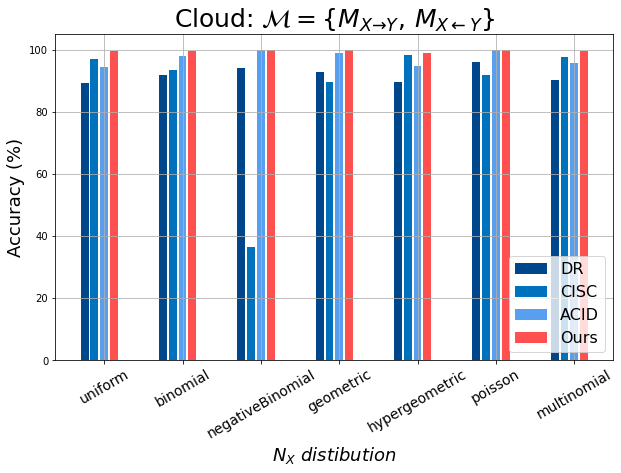

In [14]:
plt.figure(figsize=(10, 6))
i = 1
plt.bar(np.arange(i - .5, i + 13 - .5, 2), df_all.dr.values, label="DR", align="center", width=0.2, color="#00468b")
plt.bar(np.arange(i - .25, i + 13 - .25, 2), df_all.cisc.values, label="CISC", align="center", width=0.2, color="#0071bc")
plt.bar(np.arange(i - .0, i + 13 - .0, 2), df_all.acid.values, label="ACID", align="center", width=0.2, color="#589fef")
#plt.bar(np.arange(i + .2, i + 13 + .2, 2), df_all.crisp.values, label="CRISP", align="center", width=0.15, color="#589fef")
plt.bar(np.arange(i + .25, i + 13 + .25, 2), df_all.ndm.values, label="Ours", align="center", width=0.2, color="#ff5050")

plt.legend(loc="lower right")
plt.title("Cloud: "r"$\mathcal{M} = \{M_{X \to Y}, \,  M_{X \leftarrow Y}\}$", fontsize=25)
plt.xticks(np.arange(1, 14, 2), df_all.dtype.values, fontsize=14, rotation=30)
plt.ylabel("Accuracy (%)", fontsize=18)
plt.xlabel(r"$N_X \ distibution$", fontsize=18)
plt.grid()
plt.show();

## 実験3

In [139]:

dd = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

In [140]:
for causal_type1 in ["to", "gets", "indep", "confounder"]:
    for causal_type2 in ["to", "gets", "indep", "confounder"]:
        for sample_size in [100, 1000, 10000, 100000]:
            if causal_type1 == causal_type2:
                dd[causal_type1][causal_type2][sample_size] = 1000
            else:
                dd[causal_type1][causal_type2][sample_size] = 0

In [141]:
dd["to"]["indep"][100] = 691
dd["to"]["to"][100] = 288
dd["to"]["gets"][100] = 21

dd["gets"]["to"][100] = 21
dd["gets"]["gets"][100] = 288
dd["gets"]["indep"][100] = 691

dd["indep"]["indep"][100] = 993
dd["indep"]["to"][100] = 3
dd["indep"]["gets"][100] = 4

dd["confounder"]["indep"][100] = 622
dd["confounder"]["indep"][1000] = 0
dd["confounder"]["indep"][10000] = 0
dd["confounder"]["indep"][100000] = 0

dd["confounder"]["gets"][100] = 190
dd["confounder"]["gets"][1000] = 502
dd["confounder"]["gets"][10000] = 0
dd["confounder"]["gets"][100000] = 0

dd["confounder"]["to"][100] = 188
dd["confounder"]["to"][1000] = 484
dd["confounder"]["to"][10000] = 0
dd["confounder"]["to"][100000] = 0

dd["confounder"]["confounder"][100] = 0
dd["confounder"]["confounder"][1000] = 14
dd["confounder"]["confounder"][10000] = 1000
dd["confounder"]["confounder"][100000] = 1000


In [14]:
#sns.set(font_scale = 1.6)
causal_types = ["to", "gets", "indep", "confounder"]
causal_labels = [r"$M_{X \to Y}$", r"$M_{X \leftarrow Y}$", r"$M_{X ⫫ Y}$", r"$M_{X\leftarrow C \to Y}$"]

In [169]:
sns.set(font_scale=1.5)

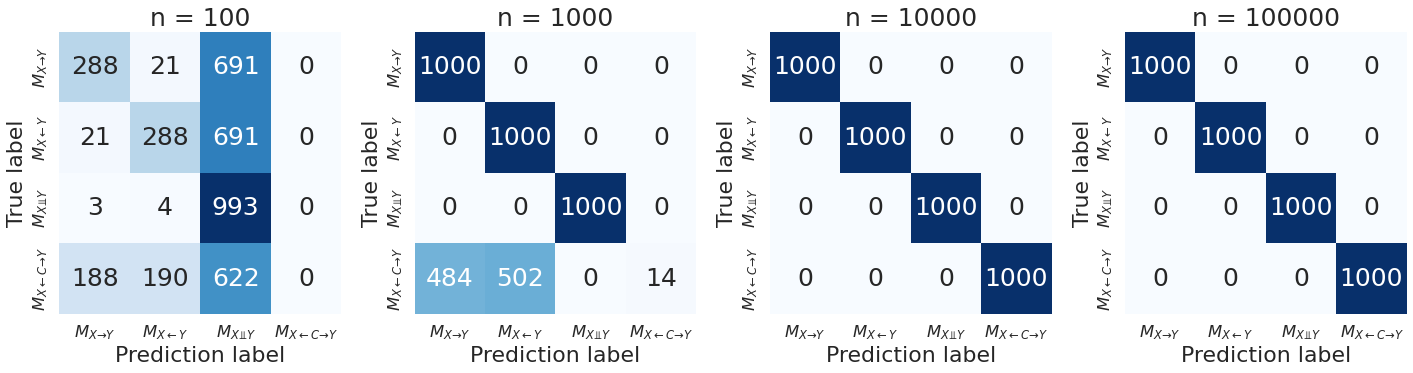

In [170]:
#plt.figure(figsize=(100, 20))
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
axes = ax.ravel()
for k, sample_size in enumerate([100, 1000, 10000, 100000]):
    cm = [[0] * 4 for _ in range(4)]
    
    for i, causal_type1 in enumerate(causal_types):
        for j, causal_type2 in enumerate(causal_types):
            #print(causal_type1, causal_type2, dd[causal_type1][causal_type2][100])
            cm[i][j] = dd[causal_type1][causal_type2][sample_size]

    df_cm = pd.DataFrame(data=cm, index=causal_labels, columns=causal_labels)
    
    axes[k].set_title(f"n = {sample_size}", fontsize = 25)
    sns.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", square=True, annot_kws={"fontsize":25}, ax=axes[k], cbar=False, )
    axes[k].set_xlabel("Prediction label", fontsize = 22)
    axes[k].set_ylabel("True label", fontsize = 22)
plt.tight_layout()
plt.show();

In [40]:
causal_type	size	ndm
to	100	28.00
to	1000	100.0
to	10000	100.0
to	100000	100.0
gets	100	28.00
gets	1000	100.0
gets	10000	100.0
gets	100000	100.0
indep	100	0.00
indep	1000	100.0
indep	10000	100.0
indep	100000	100.0
confounder	100	0.00
confounder	1000	1.40
confounder	10000	100.0
confounder	100000	100.0

SyntaxError: invalid syntax (1554898839.py, line 1)

In [18]:
causal_type_acc_df = pd.read_table("results/fixed-dim-acc-nsize.dat")

In [19]:
causal_type_acc_df

,causal_type,size,ndm
0,to,100,28.0
1,to,1000,100.0
2,to,10000,100.0
3,to,100000,100.0
4,gets,100,28.0
5,gets,1000,100.0
6,gets,10000,100.0
7,gets,100000,100.0
8,indep,100,0.0
9,indep,1000,100.0


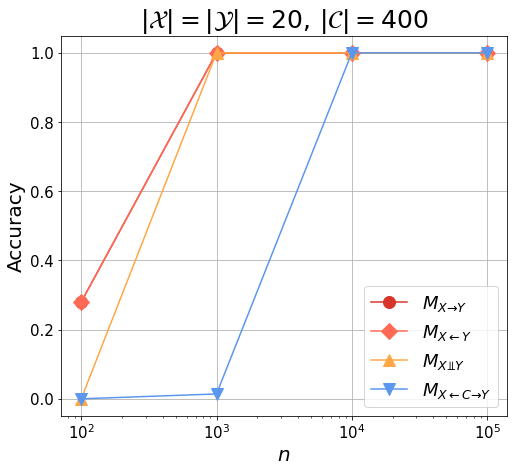

In [20]:
COLORS = ["#d7352b", "#ff6a55", "#ffa746", "#5b97ee"]#, "#5b97ee"]
MARKERS = ["o", "D", "^", "v"]

fig, ax = plt.subplots(figsize=(8, 7))
ax.set_title(label=r"$|\mathcal{X}| = |\mathcal{Y}| = 20, \,|\mathcal{C}| = 400$", fontsize=25)
#result_df = causal_type_acc_df[causal_type_acc_df["causal_type"]==causal_type]
#axes[j].plot(result_df["size"], result_df["ndm"] / 100, color=colors[i], label=causal_type, marker=MARKERS[i], markersize=8)
#plt.figure(figsize=(8, 6))
for i, (causal_type, color, marker) in enumerate(zip(causal_types, COLORS, MARKERS)):
    result_df = causal_type_acc_df[causal_type_acc_df["causal_type"]==causal_type]
    
    ax.plot(result_df["size"], result_df["ndm"] / 100, color=color, 
                 label=causal_labels[i], marker=marker, markersize=12)


ax.set_xscale('log')
ax.legend(loc="best", fontsize=18)
ax.set_xlabel(r"$n$", fontsize=20)
ax.set_ylabel("Accuracy", fontsize=20)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.grid(True)
plt.show();

In [23]:
df_to = pd.read_csv("results/test_decision_rate_to.csv", index_col=None)
df_indep = pd.read_csv("results/test_decision_rate_indep.csv", index_col=None)
df_confounder = pd.read_csv("results/test_decision_rate_confounder.csv")

In [24]:
df_to.sort_values("conf", ascending=False, inplace=True)
df_indep.sort_values("conf", ascending=False, inplace=True)
df_confounder.sort_values("conf", ascending=False, inplace=True)

In [25]:
df_to

,Unnamed: 0,flag,conf
18,18,True,71.100579
31,31,True,67.719146
75,75,True,63.653215
16,16,True,62.570336
38,38,True,59.624904
...,...,...,...
83,83,False,0.425956
51,51,True,0.413539
99,99,False,0.240685
36,36,True,0.138185


In [26]:
df_indep

,Unnamed: 0,flag,conf
49,49,True,24.118240
51,51,True,23.691425
8,8,True,23.354260
15,15,True,22.943115
22,22,True,22.348478
...,...,...,...
55,55,True,3.571010
57,57,True,3.507835
29,29,True,2.927831
76,76,True,2.020782


In [43]:
df_confounder

,Unnamed: 0,flag,conf
0,0,True,110.273944
23,23,True,110.053488
70,70,True,98.416407
19,19,True,82.230216
69,69,True,82.200713
...,...,...,...
3,3,False,1.298705
63,63,True,1.012708
22,22,False,0.756837
67,67,True,0.709612


In [45]:
np.cumsum(df_to.flag) / np.arange(1, 101)

18    1.000000
31    1.000000
75    1.000000
16    1.000000
38    1.000000
        ...   
83    0.989583
51    0.989691
99    0.979592
36    0.979798
95    0.970000
Name: flag, Length: 100, dtype: float64

In [46]:
np.cumsum(df_confounder.flag) / np.arange(1, 101)

0     1.000000
23    1.000000
70    1.000000
19    1.000000
69    1.000000
        ...   
3     0.822917
63    0.824742
22    0.816327
67    0.818182
84    0.810000
Name: flag, Length: 100, dtype: float64

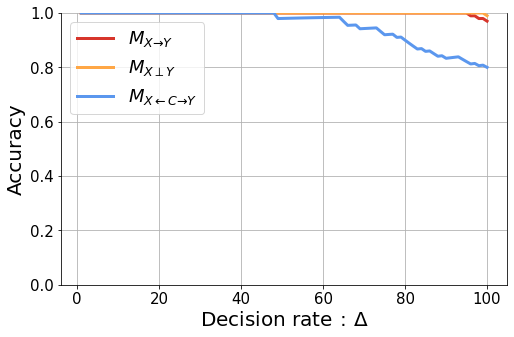

In [36]:
COLORS = ["#d7352b",  "#ffa746", "#5b97ee"]#, "#5b97ee"]
MARKERS = ["o", "^", "v"]
causal_types = ["to",  "indep", "confounder"]
causal_labels = [r"$M_{X \to Y}$", r"$M_{X \perp Y}$",  r"$M_{X\leftarrow C \to Y}$"]
results = [np.cumsum(df_to.flag) / np.arange(1, 101), 
           np.cumsum(df_indep.flag) / np.arange(1, 101), 
          np.cumsum(df_confounder.flag) / np.arange(1, 101)]
fig, ax = plt.subplots(figsize=(8, 5))
#ax.set_title(label=r"$|\mathcal{X}| = |\mathcal{Y}| = 20, \,|\mathcal{C}| = 10$", fontsize=25)
#result_df = causal_type_acc_df[causal_type_acc_df["causal_type"]==causal_type]
#axes[j].plot(result_df["size"], result_df["ndm"] / 100, color=colors[i], label=causal_type, marker=MARKERS[i], markersize=8)
#plt.figure(figsize=(8, 6))
for i, (result, causal_type, color, marker) in enumerate(zip(results, causal_types, COLORS, MARKERS)):
    
    ax.plot(np.arange(1, 1+len(result)), result, color=color, linewidth = 3.0,
                 label=causal_labels[i])#, marker=marker, markersize=8)



ax.legend(loc="best", fontsize=18)
ax.set_xlabel("Decision rate"+ r"$\, : \, \Delta$", fontsize=20)
ax.set_ylabel("Accuracy", fontsize=20)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.ylim(0, 1)
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.show();